<a href="https://colab.research.google.com/github/Caseyshea96/Caseyshea96/blob/main/lab5_510_CCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5

## Exercise 1: Calculating Distances with Functions

- Define a function `calculate_distance` that takes two geographic coordinates (latitude and longitude) and returns the distance between them using the Haversine formula.
- Use this function to calculate the distance between multiple pairs of coordinates.

In [67]:
import math

from math import sin, cos, asin, sqrt

def calculate_distance(lat1, lon1, lat2, lon2):

    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    return 2 * 6371 * asin(sqrt(sin((lat2 - lat1)/2)**2 + cos(lat1) * cos(lat2) * sin((lon2 - lon1)/2)**2))

#define the coordinates
coords = ((35.2103, 135.2135), (40.7128, -74.0060))

distance = calculate_distance(coords[0][0], coords[0][1], coords[1][0], coords[1][1])
print(f"The distance between the two points is {distance} kilometers.")

The distance between the two points is 11059.846086246152 kilometers.


## Exercise 2: Batch Distance Calculation

- Create a function `batch_distance_calculation` that accepts a list of coordinate pairs and returns a list of distances between consecutive pairs.
- Test the function with a list of coordinates representing several cities.

In [68]:
import math

from math import sin, cos, asin, sqrt

def calculate_distance(lat1, lon1, lat2, lon2):

    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    return 2 * 6371 * asin(sqrt(sin((lat2 - lat1)/2)**2 + cos(lat1) * cos(lat2) * sin((lon2 - lon1)/2)**2))

#calculate distances and return in km
def batch_distance_calculation(coord_pairs):
    return [calculate_distance(*pair[0], *pair[1]) for pair in coord_pairs]

#Test with cities
city_pairs = [
    ((36.1627, -86.7816), (35.2271, -80.8431)),  # Nashville to Charlotte
    ((40.7128, -74.0060), (34.0522, -118.2437)), # NYC to LA
    ((51.5074, -0.1278), (48.8566, 2.3522)),      # London to Paris
    ((35.6895, 139.6917), (37.7749, -122.4194))   # Tokyo to San Francisco
]
#distances
distances = batch_distance_calculation(city_pairs)

#Output
for i, pair in enumerate(city_pairs):
  print(f"The distance between {pair[0]} and {pair[1]} is {distances[i]:.2f} km")


The distance between (36.1627, -86.7816) and (35.2271, -80.8431) is 546.18 km
The distance between (40.7128, -74.006) and (34.0522, -118.2437) is 3935.75 km
The distance between (51.5074, -0.1278) and (48.8566, 2.3522) is 343.56 km
The distance between (35.6895, 139.6917) and (37.7749, -122.4194) is 8270.71 km


## Exercise 3: Creating and Using a Point Class

- Define a `Point` class to represent a geographic point with attributes `latitude`, `longitude`, and `name`.
- Add a method `distance_to` that calculates the distance from one point to another.
- Instantiate several `Point` objects and calculate the distance between them.

In [69]:
import math

class Point:

  def __init__(self, latitude, longitude, name=""):
    self.latitude = latitude
    self.longitude = longitude
    self.name = name

  def distance_to(self, other):
    # Convert decimal degrees to radians
        lat1, lon1 = math.radians(self.latitude), math.radians(self.longitude)
        lat2, lon2 = math.radians(other.latitude), math.radians(other.longitude)

        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
        c = 2 * math.asin(math.sqrt(a))
        R = 6371.0  # Earth’s radius in kilometers
        return R * c

#create point objects
point1 = Point(35.2103, 135.2135, "Tokyo")
point2 = Point(40.7128, -74.0060, "New York")
point3 = Point(51.5074, -0.1278, "London")
point4 = Point(34.0522, -118.2437, "Los Angeles")

#calculate distancesd between point objects
distance1 = point1.distance_to(point2)
distance2 = point2.distance_to(point3)
distance3 = point3.distance_to(point4)
distance4 = point4.distance_to(point1)

#print output
print(f"The distance between {point1.name} and {point2.name} is {distance1:.2f} km.")
print(f"The distance between {point2.name} and {point3.name} is {distance2:.2f} km.")
print(f"The distance between {point3.name} and {point4.name} is {distance3:.2f} km.")
print(f"The distance between {point4.name} and {point1.name} is {distance4:.2f} km.")

The distance between Tokyo and New York is 11059.85 km.
The distance between New York and London is 5570.22 km.
The distance between London and Los Angeles is 8755.60 km.
The distance between Los Angeles and Tokyo is 9176.27 km.


## Exercise 4: Reading and Writing Files

- Write a function `read_coordinates` that reads a file containing a list of coordinates (latitude, longitude) and returns them as a list of tuples.
- Write another function `write_coordinates` that takes a list of coordinates and writes them to a new file.
- Ensure that both functions handle exceptions, such as missing files or improperly formatted data.

In [70]:
import os

def read_coordinates(filename):
    # Define function to read files and return list of tuples
    coordinates = []
    try:
        with open(filename, "r") as file:
            for line in file:
                parts = line.strip().split(",")  # Expecting CSV format (lat, lon)
                if len(parts) != 2:
                    print(f"Skipping invalid line: {line.strip()}")
                    continue
                try:
                    lat, lon = float(parts[0]), float(parts[1])
                    coordinates.append((lat, lon))
                except ValueError:
                    print(f"Skipping invalid data: {line.strip()}")
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

    return coordinates

# Define function to write list of coordinate tuples to CSV
def write_coordinates(coordinates, filename):
    try:
        with open(filename, "w") as file:
            for lat, lon in coordinates:
                file.write(f"{lat},{lon}\n")
        print(f"Coordinates successfully written to '{filename}'.")
    except Exception as e:
        print(f"An error occurred while writing to '{filename}': {e}")


# Define output
input_file = "coordinates.txt"
output_file = "output_coords.txt"

# Read Coordinates from file
coords = read_coordinates(input_file)
print(f"Coordinates read from '{input_file}': {coords}")

# Write coordinates to file
write_coordinates(coords, output_file)



Coordinates read from 'coordinates.txt': [(35.6895, 139.6917), (34.0522, -118.2437), (51.5074, -0.1278), (-33.8688, 151.2093), (48.8566, 2.3522)]
Coordinates successfully written to 'output_coords.txt'.


## Exercise 5: Processing Coordinates from a File

- Create a function that reads coordinates from a file and uses the `Point` class to create `Point` objects.
- Calculate the distance between each consecutive pair of points and write the results to a new file.
- Ensure the function handles file-related exceptions and gracefully handles improperly formatted lines.

In [71]:
import math

# Create a Point class
class Point:

    def __init__(self, latitude, longitude, name=""):
        self.latitude = latitude
        self.longitude = longitude
        self.name = name

    # Haversine formula and whatnot
    def distance_to(self, other):
        # Convert decimal degrees to radians
        lat1, lon1 = math.radians(self.latitude), math.radians(self.longitude)
        lat2, lon2 = math.radians(other.latitude), math.radians(other.longitude)

        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

        R = 6371.0  # Earth’s radius in kilometers
        distance = R * c
        return distance

import math

# Create a Point class
class Point:

    def __init__(self, latitude, longitude, name=""):
        self.latitude = latitude
        self.longitude = longitude
        self.name = name

    # Haversine formula and whatnot
    def distance_to(self, other):
        # Convert decimal degrees to radians
        lat1, lon1 = math.radians(self.latitude), math.radians(self.longitude)
        lat2, lon2 = math.radians(other.latitude), math.radians(other.longitude)

        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

        R = 6371.0  # Earth’s radius in kilometers
        distance = R * c
        return distance

# Define function to read coords and calculate distance
def read_and_calc_distances(input_file, output_file):
    points = []
    try:
        with open(input_file, "r") as file:
            for line in file:
                parts = line.strip().split(",")
                if len(parts) != 2:
                    print(f"Skipping invalid line: {line.strip()}")
                    continue
                try:
                    lat, lon = float(parts[0]), float(parts[1])
                    points.append(Point(lat, lon))
                except ValueError:
                    print(f"Skipping invalid data: {line.strip()}")

    except FileNotFoundError:
        print(f"Error: File '{input_file}' not found.")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")

    # Calculate distances between consecutive points
    distances = []
    for i in range(1, len(points)):
        distance = points[i-1].distance_to(points[i])
        distances.append(distance)

    # Write distances to output file and print them
    try:
        with open(output_file, "w") as file:
            for i, distance in enumerate(distances):
                result = f"Distance between point {i+1} and point {i+2}: {distance:.2f} km"
                file.write(result + "\n")
                print(result)  # Print the distance to the console
        print(f"Distances written to '{output_file}'.")
    except Exception as e:
        print(f"An error occurred while writing to the output file: {e}")

# Create a sample coordinates.txt file
sample_data = """35.6895,139.6917
34.0522,-118.2437
51.5074,-0.1278
-33.8688,151.2093
48.8566,2.3522"""

output_file = "coordinates.txt"

try:
    with open(output_file, "w") as file:
        file.write(sample_data)
    print(f"Sample file '{output_file}' has been created successfully.")
except Exception as e:
    print(f"An error occurred while creating the file: {e}")

# Use function to calculate distances
read_and_calc_distances("coordinates.txt", "distances.txt")


Sample file 'coordinates.txt' has been created successfully.
Distance between point 1 and point 2: 8815.47 km
Distance between point 2 and point 3: 8755.60 km
Distance between point 3 and point 4: 16993.93 km
Distance between point 4 and point 5: 16960.50 km
Distances written to 'distances.txt'.


## Exercise 6: Exception Handling in Data Processing

- Modify the `batch_distance_calculation` function to handle exceptions that might occur during the calculation, such as invalid coordinates.
- Ensure the function skips invalid data and continues processing the remaining data.

In [72]:
import math
from math import sin, cos, asin, sqrt

def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    return 2 * 6371 * asin(sqrt(sin((lat2 - lat1)/2)**2 + cos(lat1) * cos(lat2) * sin((lon2 - lon1)/2)**2))

# Calculate distances and return in km, handling exceptions
def batch_distance_calculation(coord_pairs):
    distances = []
    for pair in coord_pairs:
        try:
            # Ensure all coordinates are valid numbers
            if len(pair) != 2 or len(pair[0]) != 2 or len(pair[1]) != 2:
                raise ValueError("Each pair must contain two coordinate tuples.")

            # Unpack coordinates and check for invalid data
            (lat1, lon1), (lat2, lon2) = pair
            if not all(isinstance(coord, (int, float)) for coord in [lat1, lon1, lat2, lon2]):
                raise ValueError("All coordinates must be numeric.")

            # Calculate the distance and append it to the list
            distance = calculate_distance(lat1, lon1, lat2, lon2)
            distances.append(distance)
        except (ValueError, TypeError) as e:
            # Skip invalid data and print an error message
            print(f"Skipping invalid coordinates {pair}: {e}")
            distances.append(None)  # Add None for invalid entries

    return distances

# Test with cities
city_pairs = [
    ((36.1627, -86.7816), (35.2271, -80.8431)),  # Nashville to Charlotte
    ((40.7128, -74.0060), (34.0522, -118.2437)), # NYC to LA
    ((51.5074, -0.1278), (48.8566, 2.3522)),      # London to Paris
    ((35.6895, 139.6917), (37.7749, -122.4194)),  # Tokyo to San Francisco
    ((None, 139.6917), (37.7749, -122.4194)),     # Invalid coordinates
    ((40.7128, -74.0060), "invalid_data")         # Invalid coordinates
]

# Distances
distances = batch_distance_calculation(city_pairs)

# Output
for i, (pair, distance) in enumerate(zip(city_pairs, distances)):
    if distance is not None:
        print(f"The distance between {pair[0]} and {pair[1]} is {distance:.2f} km")
    else:
        print(f"Could not calculate distance for {pair[0]} and {pair[1]} due to invalid data.")


Skipping invalid coordinates ((None, 139.6917), (37.7749, -122.4194)): All coordinates must be numeric.
Skipping invalid coordinates ((40.7128, -74.006), 'invalid_data'): Each pair must contain two coordinate tuples.
The distance between (36.1627, -86.7816) and (35.2271, -80.8431) is 546.18 km
The distance between (40.7128, -74.006) and (34.0522, -118.2437) is 3935.75 km
The distance between (51.5074, -0.1278) and (48.8566, 2.3522) is 343.56 km
The distance between (35.6895, 139.6917) and (37.7749, -122.4194) is 8270.71 km
Could not calculate distance for (None, 139.6917) and (37.7749, -122.4194) due to invalid data.
Could not calculate distance for (40.7128, -74.006) and invalid_data due to invalid data.


## Exercise 7: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude) and perform basic array operations.

1. Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).
2. Convert the latitude and longitude values from degrees to radians using np.radians().
3. Calculate the element-wise difference between Tokyo and the other cities' latitude and longitude in radians.

In [73]:
import numpy as np

# Create NumPy array with some nice cities
cities_coords = np.array([
    [35.6895, 139.6917],  # Tokyo
    [40.7128, -74.0060],  # New York
    [51.5074, -0.1278],   # London
    [48.8566, 2.3522]     # Paris
])

#Add city names to a list
cities_names = ["Tokyo", "New York", "London", "Paris"]

# Convert to radians
cities_coords_rad = np.radians(cities_coords)

# Get Tokyo's coordinates
tokyo_coords = cities_coords_rad[0]

# Calculate differences
differences = cities_coords_rad - tokyo_coords

# Print the results
print("\nElement-wise difference between Tokyo and other cities' coordinates in radians:")
for i, city in enumerate(cities_names):
    if city != "Tokyo":  # Avoid printing Tokyo's difference with itself
        print(f"Difference between Tokyo and {city}: {differences[i]}")



Element-wise difference between Tokyo and other cities' coordinates in radians:
Difference between Tokyo and New York: [ 0.08767312 -3.72972847]
Difference between Tokyo and London: [ 0.27607444 -2.44031063]
Difference between Tokyo and Paris: [ 0.22980925 -2.39702647]


## Exercise 8: Pandas DataFrame Operations with Geospatial Data

In this exercise, you'll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

1. Load the world cities dataset from this URL using Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Display the first 5 rows and check for missing values.
3. Filter the dataset to only include cities with a population greater than 1 million.
4. Group the cities by their country and calculate the total population for each country.
5. Sort the cities by population in descending order and display the top 10 cities.

In [74]:
import pandas as pd

# Load dataset
url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
cities_df = pd.read_csv(url)

# Display first 5 rows
print("First 5 rows of the dataset:")
print(cities_df.head())  # Use cities_df here

# Check for missing values
print("\nMissing values in the dataset:")
print(cities_df.isnull().sum())  # Use cities_df here

# Filter the dataset to only include cities with a population over 1 million
cities_over_million = cities_df[cities_df['population'] > 1000000]

# Group cities by country and calculate total population for each country
population_by_country = cities_over_million.groupby('country')['population'].sum().reset_index()

# Sort cities by population in descending order and display the top 10 cities
top_10_cities = cities_over_million.sort_values(by='population', ascending=False).head(10)

# Display the results
print("\nTop 10 cities by population (greater than 1 million):")
print(top_10_cities[['name', 'country', 'population']])



First 5 rows of the dataset:
   id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062

Missing values in the dataset:
id            0
name          0
country       0
latitude      0
longitude     0
population    0
dtype: int64

Top 10 cities by population (greater than 1 million):
              name country  population
1239         Tokyo     JPN    35676000
1224      New York     USA    19040000
1230   Mexico City     MEX    19028000
1240        Mumbai     IND    18978000
1245     Sao Paulo     BRA    18845000
1148         Delhi     IND    15926000
1238      Shanghai     CHN    14987000
1243       Kolkata     IND    14787000
1175         Dhaka     BGD    12797394
1217  Buenos Aires     AR

## Exercise 9: Creating and Manipulating GeoDataFrames with GeoPandas

This exercise focuses on creating and manipulating GeoDataFrames, performing spatial operations, and visualizing the data.

1. Load the New York City building dataset from the GeoJSON file using GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson
2. Create a plot of the building footprints and color them based on the building height (use the `height_MS` column).
3. Create an interactive map of the building footprints and color them based on the building height (use the `height_MS` column).
4. Calculate the average building height (use the `height_MS` column).
5. Select buildings with a height greater than the average height.
6. Save the GeoDataFrame to a new GeoJSON file.

Missing values detected in 'height_MS'. Filling them with 0.


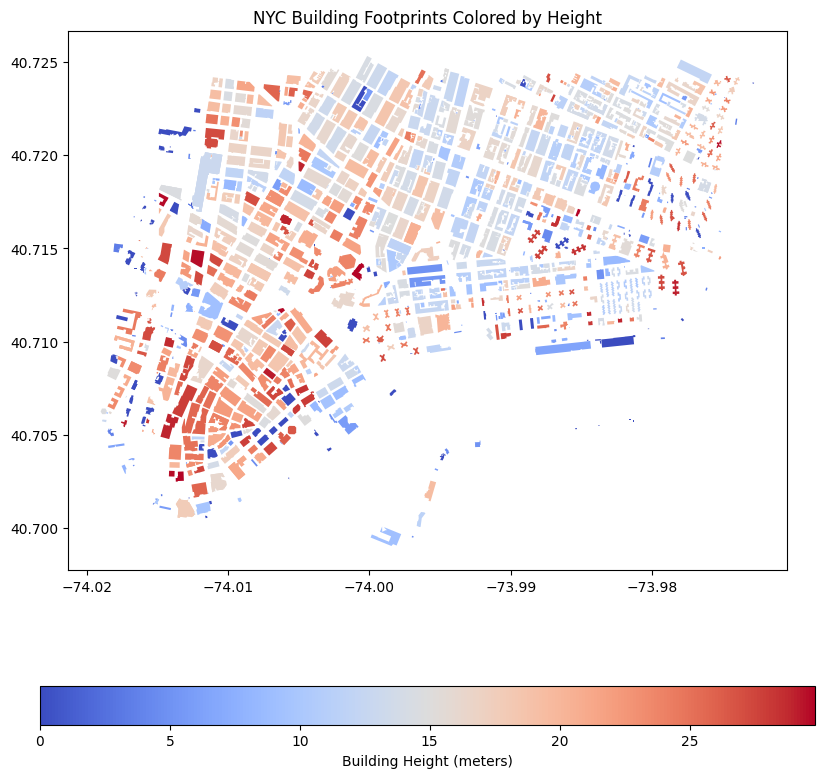

Interactive map saved as 'nyc_buildings_map_interactive.html'
Average Building Height: 14.31 meters
Tall buildings saved to 'tall_buildings.geojson'


In [75]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex

# Load dataset from GeoJSON
url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
gdf = gpd.read_file(url)

# Check for missing values in 'height_MS' and handle them
if gdf['height_MS'].isnull().sum() > 0:
    print("Missing values detected in 'height_MS'. Filling them with 0.")
    gdf['height_MS'] = gdf['height_MS'].fillna(0)

# Plot building footprints, color based on height
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(
    ax=ax, column='height_MS', cmap='coolwarm', legend=True,
    legend_kwds={'label': "Building Height (meters)", 'orientation': "horizontal"}
)
ax.set_title("NYC Building Footprints Colored by Height")
plt.show()

# Create an interactive Folium map
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add building footprints with coloring based on height
def style_function(feature):
    # Normalize height_MS values for color
    height = feature['properties']['height_MS'] or 0  # Use 0 if height is missing
    norm = (height - gdf['height_MS'].min()) / (gdf['height_MS'].max() - gdf['height_MS'].min())
    color = to_hex(plt.cm.coolwarm(norm)[:3])  # Convert RGB to HEX
    return {
        'fillColor': color,
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6
    }

# Add GeoJson layer with tooltips
folium.GeoJson(
    gdf,
    style_function=lambda feature: {
        'fillColor': to_hex(plt.cm.coolwarm(
            (feature['properties']['height_MS'] or 0 - gdf['height_MS'].min()) /
            (gdf['height_MS'].max() - gdf['height_MS'].min())
        )[:3]),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['height_MS', 'NAME'],  # Adjusted to available fields
        aliases=['Height (m)', 'Building Name']  # User-friendly labels for these fields
    )
).add_to(nyc_map)


# Save the interactive map as an HTML file
nyc_map.save('nyc_buildings_map_interactive.html')
print("Interactive map saved as 'nyc_buildings_map_interactive.html'")

# Calculate the average building height
average_height = gdf['height_MS'].mean()
print(f"Average Building Height: {average_height:.2f} meters")

# Select buildings taller than the average height
high_buildings = gdf[gdf['height_MS'] > average_height]

# Save tall buildings to GeoJSON
high_buildings.to_file('tall_buildings.geojson', driver='GeoJSON')
print("Tall buildings saved to 'tall_buildings.geojson'")




## Exercise 10: Combining NumPy, Pandas, and GeoPandas

This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

1. Use Pandas to load the world cities dataset from this URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
3. Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
4. Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).
5. Calculate the distance (in meters) between each city and the city of Paris.
6. Plot the cities on a world map, coloring the points by their distance from Paris.

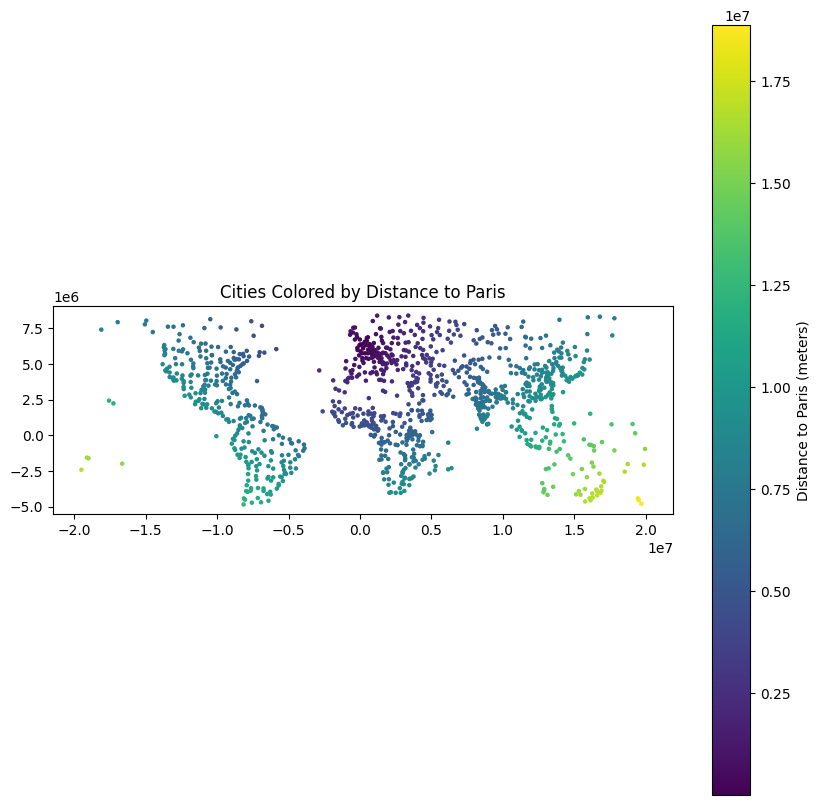

In [76]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from geopy.distance import geodesic

#Load world city dataset
url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
cities_df = pd.read_csv(url)

#Filter to cities with lat between -40 and 60
northern_cities = cities_df[(cities_df['latitude'] >= -40) & (cities_df['latitude'] <= 60)]

#create GeoDataFrame
geometry = [Point(xy) for xy in zip(northern_cities['longitude'], northern_cities['latitude'])]
gdf = gpd.GeoDataFrame(northern_cities, geometry=geometry, crs="EPSG:4326")

#Reproject to Mercator
gdf = gdf.set_crs("EPSG:4326").to_crs("EPSG:3857")

#Calculate distance between Paris and others
paris_coords = (48.8566, 2.3522)  # (latitude, longitude) of Paris

#Def function to calculate distances
def calculate_distance(row):
    city_coords = (row['latitude'], row['longitude'])
    return geodesic(paris_coords, city_coords).meters

gdf['distance_to_paris'] = gdf.apply(lambda row: calculate_distance(row), axis=1)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot cities as points with color based on distance to Paris
gdf.plot(ax=ax, column='distance_to_paris', cmap='viridis', markersize=5)

# Create a ScalarMappable object for the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=gdf['distance_to_paris'].min(), vmax=gdf['distance_to_paris'].max()))
sm.set_array([])

# Add colorbar with the right axis (ax) reference
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Distance to Paris (meters)')

# Show the plot
ax.set_title("Cities Colored by Distance to Paris")
plt.show()


## Submission Requirements

Complete the exercises above and and upload the notebook to your GitHub repository. Make sure the notebook has a Colab badge at the top so that it can be easily opened in Google Colab. Submit the URL of the notebook to Canvas.